# Problem 1

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

### a) Sketch the sampling distribution of the difference in means under the null and alternative hypotheses

Difference in means implies that that we have another variable, $d = u_{\text{treat}} -u_{\text{control}}$.

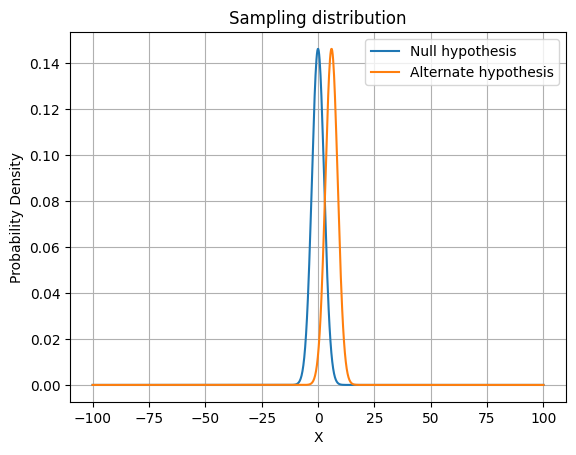

In [3]:
se = np.sqrt((12)**2/35 + (10)**2/30)  # This gives you the standard error

d_null = 0

# Generate sample from the null sampling distribution
np.random.seed(42)  # For reproducibility
x = np.linspace(-100, 100, 1000)
pdf_values = norm.pdf(x, loc=d_null, scale=se) # Calculate PDF values for standard normal

plt.plot(x, pdf_values, label='Null hypothesis')
plt.title("Sampling distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.grid(True)

d_alt = 78-72

# Generate sample from the null sampling distribution
np.random.seed(42)  # For reproducibility
x = np.linspace(-100, 100, 1000)
pdf_values = norm.pdf(x, loc=d_alt, scale=se) # Calculate PDF values for standard normal

plt.plot(x, pdf_values, label='Alternate hypothesis')
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()






### b) What is the standard error of the difference in sample means? What is the distribution of the test statistic under the null?

In [4]:
se = np.sqrt((12)**2/35 + (10)**2/30)  # This gives you the standard error
print(se)

2.7290326212083005


Distribution of the test statistic is approximately normal N(0,1) or T distribution with degrees of freedom =30+35-2=63

### (c) Compute the t-statistic for the observed data.

In [5]:
t_stat = (78-72)/se

print("T_stat is", t_stat)

T_stat is 2.1985812677253573


### (d) What is the critical value for a one-sided test at the 5% significance level? Should the researcher reject the null?

Degrees of freedom = 35+30-2 = 63, so we can use the Z distribution to estimate the t-distribution since n is large enough. The critical value of a one sided t-test at the 5% significance level is 1.65. Hence we should reject the null. 

### (e) What is the p-value corresponding to the observed t-statistic?

In [6]:
p_value = 1-norm.cdf(x=t_stat)
print("p_value =", p_value)

p_value = 0.01395385507179292


### (f) Suppose the actual difference in population means is 8 points. What is the power of the test in that case? What steps could increase the power?

The power of a test is 1-Beta. Where beta is the type II error. The type II error is the probability of a false negative (i.e., given the alternate is true what is the probability we reject the null). 

To compute this all we need to think about is the distribution of the null, alternate and the acceptance region of the null. We know that we would accept the null in the case t_statistic is 1.65 or lower. 

From the perspective of the alternate hypothesis this is the same as saying that the t-statistics is 1.65-8 = -6.35 if the alternate was mean centered.

In [7]:
t_stat = (8)/se

print("T_stat is", t_stat)

T_stat is 2.9314416903004763


In [8]:
Beta = p_value = norm.cdf(x=1.65-t_stat)

print("Power = ", 1-Beta)

Power =  0.8999807157202888


Steps to increase the power of the test: 
i) You may increase the power by increasing the sample size of the test to use the LLN to drive up the statistical power of the test.
ii) Another way to increase the power is to reduce the significance level of the test. 

# Problem 2

In [9]:
vote_df = pd.read_stata('../Data/VOTE1.dta')
vote_df

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB
0,NaN,7,1,68,328.299988,8.740000,41,5.793916,2.167567
1,NaN,1,0,62,626.380005,402.480011,60,6.439952,5.997638
2,NaN,2,1,73,99.610001,3.070000,55,4.601233,1.120048
3,NaN,3,0,69,319.690002,26.280001,64,5.767352,3.268846
4,NaN,3,0,75,159.220001,60.049999,66,5.070293,4.095244
...,...,...,...,...,...,...,...,...,...
168,NaN,4,0,39,32.040001,152.270004,42,3.466954,5.025662
169,NaN,3,1,32,22.629999,359.799988,53,3.119100,5.885551
170,NaN,5,0,36,197.460007,1278.530029,36,5.285536,7.153463
171,NaN,7,0,38,202.589996,450.720001,46,5.311189,6.110837


### a) construct variable X which is the share of A.

In [10]:
vote_df['X'] = (vote_df['expendA']/(vote_df['expendA']+vote_df['expendB']))*100
vote_df = vote_df.rename(columns={"voteA":"Y"})

vote_df

,state,district,democA,Y,expendA,expendB,prtystrA,lexpendA,lexpendB,X
0,NaN,7,1,68,328.299988,8.740000,41,5.793916,2.167567,97.406837
1,NaN,1,0,62,626.380005,402.480011,60,6.439952,5.997638,60.880978
2,NaN,2,1,73,99.610001,3.070000,55,4.601233,1.120048,97.010132
3,NaN,3,0,69,319.690002,26.280001,64,5.767352,3.268846,92.403969
4,NaN,3,0,75,159.220001,60.049999,66,5.070293,4.095244,72.613678
...,...,...,...,...,...,...,...,...,...,...
168,NaN,4,0,39,32.040001,152.270004,42,3.466954,5.025662,17.383757
169,NaN,3,1,32,22.629999,359.799988,53,3.119100,5.885551,5.917423
170,NaN,5,0,36,197.460007,1278.530029,36,5.285536,7.153463,13.378140
171,NaN,7,0,38,202.589996,450.720001,46,5.311189,6.110837,31.009781


### b) Calculate the sample means of X and Y

In [11]:
mean_x = vote_df['X'].mean()
mean_y = vote_df['Y'].mean()

print(f"Sample mean X = {mean_x}, sample mean Y = {mean_y}")


Sample mean X = 51.07644271850586, sample mean Y = 50.50289017341041


### c) Calculate the sample standard deviations of X and Y and the sample correlation coefficient between X and Y

In [12]:
mean_x = vote_df['X'].std()
mean_y = vote_df['Y'].std()

print(f"Sample std dev X = {mean_x}, sample std dev Y = {mean_y}")


Sample std dev X = 33.483558654785156, sample std dev Y = 16.78476062601882


### d) Produce the OLS estimated regression coefficients from the regression

In [13]:
X = sm.add_constant(vote_df['X'])
Y = vote_df['Y']

model = sm.OLS(endog=Y, exog=X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           6.62e-74
Time:                        09:31:25   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8122      0.887     30.221      0.0

### e), f) Create new variables Y_hat and u_hat

In [14]:
#initialize the Y_hat column
vote_df['Y_hat'] = 0

X_with_constant = sm.add_constant(vote_df['X'])
vote_df['Y_hat'] = model.predict(X_with_constant)
vote_df['u_hat'] = vote_df['Y']-vote_df['Y_hat']

vote_df



,state,district,democA,Y,expendA,expendB,prtystrA,lexpendA,lexpendB,X,Y_hat,u_hat
0,NaN,7,1,68,328.299988,8.740000,41,5.793916,2.167567,97.406837,71.992217,-3.992217
1,NaN,1,0,62,626.380005,402.480011,60,6.439952,5.997638,60.880978,55.050507,6.949493
2,NaN,2,1,73,99.610001,3.070000,55,4.601233,1.120048,97.010132,71.808214,1.191786
3,NaN,3,0,69,319.690002,26.280001,64,5.767352,3.268846,92.403969,69.671747,-0.671747
4,NaN,3,0,75,159.220001,60.049999,66,5.070293,4.095244,72.613678,60.492460,14.507540
...,...,...,...,...,...,...,...,...,...,...,...,...
168,NaN,4,0,39,32.040001,152.270004,42,3.466954,5.025662,17.383757,34.875286,4.124714
169,NaN,3,1,32,22.629999,359.799988,53,3.119100,5.885551,5.917423,29.556881,2.443119
170,NaN,5,0,36,197.460007,1278.530029,36,5.285536,7.153463,13.378140,33.017370,2.982630
171,NaN,7,0,38,202.589996,450.720001,46,5.311189,6.110837,31.009781,41.195415,-3.195415


### g) Sum of u_hat and explanation of why it is zero

In [15]:
s = vote_df['u_hat'].sum()

print("The sum of u_hat is =",s)

The sum of u_hat is = -1.2221335055073723e-12


The sum of u_hat should be zero because by the first order conditions of OLS the variables should sum to zero. As in if you take the derivative of OLS loss with respect to the intercept of your OLS you get the output that the residuals must sum to 0.

### (h) Graph the scatterplot of the data points and the regression line.

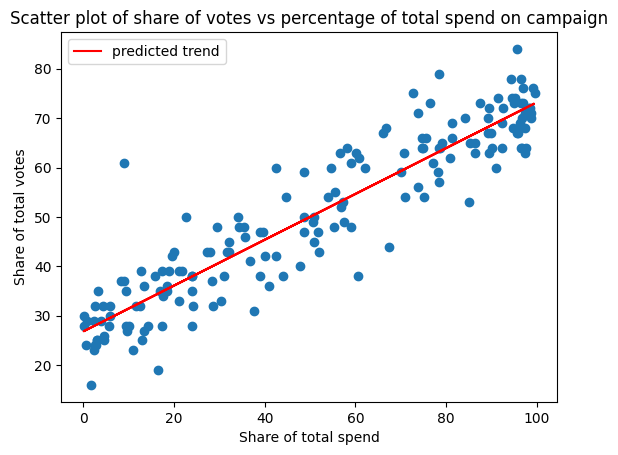

In [ ]:
plt.scatter(vote_df['X'], vote_df['Y'])
plt.title('Scatter plot of share of votes vs percentage of total spend on campaign')
plt.xlabel('Share of total spend (%)')
plt.ylabel('Share of total votes (%)')
plt.plot(vote_df['X'],vote_df['Y_hat'], color='r', label='predicted trend')
plt.legend()
plt.show()

# Problem 3

In [17]:
X = sm.add_constant(vote_df['X'])
Y = vote_df['Y']

model = sm.OLS(endog=Y, exog=X).fit(cov_type='HC0')
print(model.summary(alpha=0.05))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.96e-79
Time:                        09:31:25   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8122      0.880     30.465      0.0

### b) What is the estimated slope? Explain in words what it means. Is the estimated effect of spending on share large or small? Explain what you mean by "large" or "small"

The estimated slope is 0.46, the estimated spending effect is quite large. E.g., for every 1 percent point increase in the share of spend the share of votes goes up 0.46. So it is large in the effect that more spending has a significant increase on the share of the election that somebody will win.

### Report the 95% confidence interval for β1, the slope of the population regression line.

From the regression above the 95% confidence interval  is 0.438 to 0.490.

### c) Does spending explain a large fraction of the variance in vote? Explain.

Quite clearly since the R^2 (0.856) is high a large variance in the vote is explained by the linear relationship between spending and the percent of variance in the vote.

### d) Look at the correlation coefficient between share and vote computed in the previous problem, and compare its square to the R2. How are they related? Provide a simple mathematical derivation of this fact.

In [18]:
corr_matrix = vote_df.corr()

rho = corr_matrix.loc['Y','X']
print(rho)

rho_squared = rho**2
print(rho_squared)


0.9252801762904964
0.8561434046361721


Quite clearly rho squared looks equal to the R squared. 

Derivation:

$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\;\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$

$$
r^2 = \frac{\left(\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})\right)^2}{\left(\sum_{i=1}^n (x_i - \bar{x})^2\right)\left(\sum_{i=1}^n (y_i - \bar{y})^2\right)}
$$

---

In simple linear regression with intercept:
$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, \quad \text{with} \quad 
\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}.
$$

Thus,
$$
\hat{y}_i - \bar{y} = \hat{\beta}_1 (x_i - \bar{x}).
$$

---

Explained sum of squares:
$$
ESS = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 
     = \sum_{i=1}^n \big(\hat{\beta}_1 (x_i - \bar{x})\big)^2
     = \hat{\beta}_1^2 \sum_{i=1}^n (x_i - \bar{x})^2.
$$

Substitute $\hat{\beta}_1$:
$$
ESS = \left(\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}\right)^2 \sum_{i=1}^n (x_i - \bar{x})^2,
$$

$$
ESS = \frac{\left(\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})\right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}.
$$

---

Total sum of squares:
$$
SST = \sum_{i=1}^n (y_i - \bar{y})^2.
$$

Coefficient of determination:
$$
R^2 = \frac{ESS}{SST} 
     = \frac{\dfrac{\left(\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})\right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}}{\sum_{i=1}^n (y_i - \bar{y})^2}.
$$

Simplify:
$$
R^2 = \frac{\left(\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})\right)^2}{\left(\sum_{i=1}^n (x_i - \bar{x})^2\right)\left(\sum_{i=1}^n (y_i - \bar{y})^2\right)}.
$$

---

Therefore,
$$
R^2 = r^2.
$$

The relationship between correlation coefficient squared and R² in simple linear regression:

In simple linear regression, $\rho^2_{XY} = R^2$ because both measure the proportion of variance in Y explained by X.



### What is the root mean squared error of the regression? What does this mean?

In [19]:
RMSE = np.sqrt(np.mean(vote_df['u_hat']**2))
print(RMSE)

6.347770441872386


The RMSE is the average absolute distance of the true variable from the predicted line

### f) Based on your graph from 2(h), does the error term appear to be homoskedastic or heteroskedastic?

The regression appears to be homoskedastic with no changing variance in the residuals


### Run the regression again without the robust" option. Compare the results to what you obtained with the robust" option. What is the same and what is dierent?

This is done before. The only change is that heteroskedasticity robust provides a tighter bound on the confidence interval which usually happens when there is some heteroskedasticity. That's the only major difference